<a href="https://colab.research.google.com/github/rajkhatana/Khatana/blob/master/text_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sbn
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [243]:
## load dataset
df = pd.read_csv("bbc-text.csv")
df.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [244]:
df.shape

(2225, 2)

In [245]:
df['text'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [246]:
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [247]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

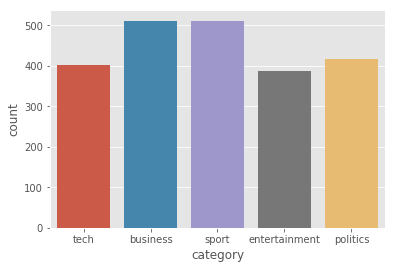

In [248]:
sbn.countplot(df['category'])

In [249]:
# Use sklearn utility to convert label strings to numbered index
from sklearn.preprocessing import LabelEncoder
df["category"] = LabelEncoder().fit_transform(df["category"])
df.head()

,category,text
0,4,tv future in the hands of viewers with home th...
1,0,worldcom boss left books alone former worldc...
2,3,tigers wary of farrell gamble leicester say ...
3,3,yeading face newcastle in fa cup premiership s...
4,1,ocean s twelve raids box office ocean s twelve...


In [250]:
#tokenize the words (text)
stemmer = PorterStemmer()
words = stopwords.words("english")
df['text'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(df['text']).toarray()
df.head()

,category,text
0,4,tv futur hand viewer home theatr system plasma...
1,0,worldcom boss left book alon former worldcom b...
2,3,tiger wari farrel gambl leicest say rush make ...
3,3,yead face newcastl fa cup premiership side new...
4,1,ocean twelv raid box offic ocean twelv crime c...


In [251]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.30, random_state=0)
# Inspect the dimenstions of our training and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1557,)
(668,)
(1557,)
(668,)


In [0]:
#convert to a vector with 1000 words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 1000)
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)
X_train = X_train.todense()

In [253]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [254]:
print("Accuracy of Logistic Regression:", score)

Accuracy of Logistic Regression: 0.9745508982035929


In [0]:
# Converts the labels to a one-hot representation
import keras
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# Build the model
from tensorflow import keras
layers = keras.layers
models = keras.models
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

model.add(Dense(20, input_dim= 1000,activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(num_classes , activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [258]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 20)                20020     
_________________________________________________________________
dense_47 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_48 (Dense)             (None, 5)                 105       
Total params: 20,545
Trainable params: 20,545
Non-trainable params: 0
_________________________________________________________________


In [259]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_split=0.10,
                     batch_size=4)

Train on 1401 samples, validate on 156 samples
Epoch 1/50
1401/1401 [==============================] - 2s 2ms/step - loss: 0.6100 - acc: 0.8144 - val_loss: 0.3113 - val_acc: 0.8974
Epoch 2/50
1401/1401 [==============================] - 1s 901us/step - loss: 0.0733 - acc: 0.9843 - val_loss: 0.1114 - val_acc: 0.9808
Epoch 3/50
1401/1401 [==============================] - 1s 899us/step - loss: 0.0187 - acc: 0.9979 - val_loss: 0.0808 - val_acc: 0.9808
Epoch 4/50
1401/1401 [==============================] - 1s 884us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 0.0778 - val_acc: 0.9744
Epoch 5/50
1401/1401 [==============================] - 1s 929us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0814 - val_acc: 0.9744
Epoch 6/50
1401/1401 [==============================] - 1s 905us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0764 - val_acc: 0.9744
Epoch 7/50
1401/1401 [==============================] - 1s 910us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0794 - val_acc: 0.9744
Epo

In [260]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9974
Testing Accuracy:  0.9775


In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

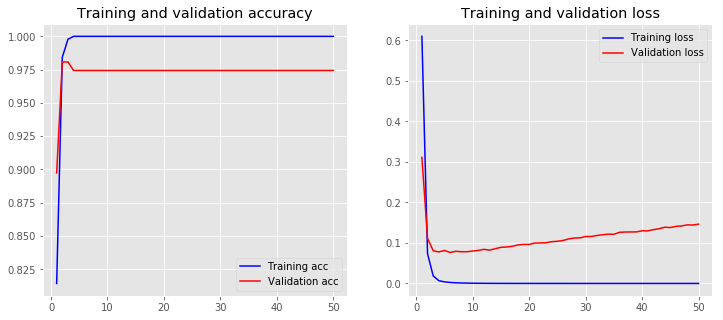

In [262]:
plot_history(history)

In [0]:
y_softmax = model.predict(X_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [264]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test_1d, y_pred_1d))

print(metrics.classification_report(y_test_1d, y_pred_1d))

from sklearn.metrics import accuracy_score

print("Accuracy of Deep Model is:",accuracy_score(y_test_1d, y_pred_1d))


[[146   0   5   0   1]
 [  0 106   2   1   0]
 [  2   1 108   1   1]
 [  0   0   0 177   0]
 [  0   0   1   0 116]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       152
           1       0.99      0.97      0.98       109
           2       0.93      0.96      0.94       113
           3       0.99      1.00      0.99       177
           4       0.98      0.99      0.99       117

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668

Accuracy of Deep Model is: 0.9775449101796407
